In [2]:
%matplotlib inline

In [3]:
import matplotlib as mpl
mpl.style.use('/home/apizzuto/Nova/scripts/novae_plots.mplstyle')
import sys
sys.path.append('/home/apizzuto/Nova/scripts/')
import plotting as pg
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

In [4]:
reload(pg)

<module 'plotting' from '/home/apizzuto/Nova/scripts/plotting.py'>

Setting up Analysis for:
GRECOv2.5
Setting up GRECOv2.5...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.
Setting up Analysis for:
GRECOv2.5
Setting up GRECOv2.5...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.
Setting up Analysis for:
GRECOv2.5
Setting up GRECOv2.5...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.


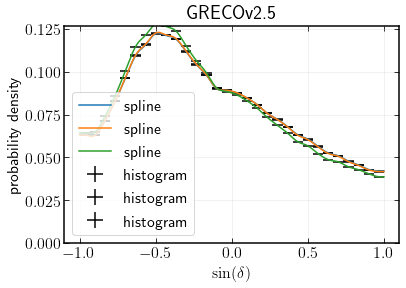

In [5]:
fig, ax = plt.subplots()

for minloge in [0.0, 0.5, 1.0]:
    gplots = pg.GRECOPlots(min_log_e=minloge)
    gplots.declination_pdf(ax=ax)

In [31]:
reload(pg)

<module 'plotting' from '/home/apizzuto/Nova/scripts/plotting.py'>

In [32]:
gplots = pg.GRECOPlots(min_log_e=None)

Setting up Analysis for:
GRECOv2.5
Setting up GRECOv2.5...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.


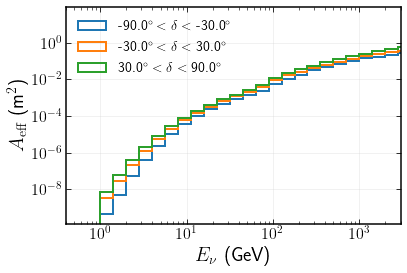

In [33]:
gplots.effective_area()

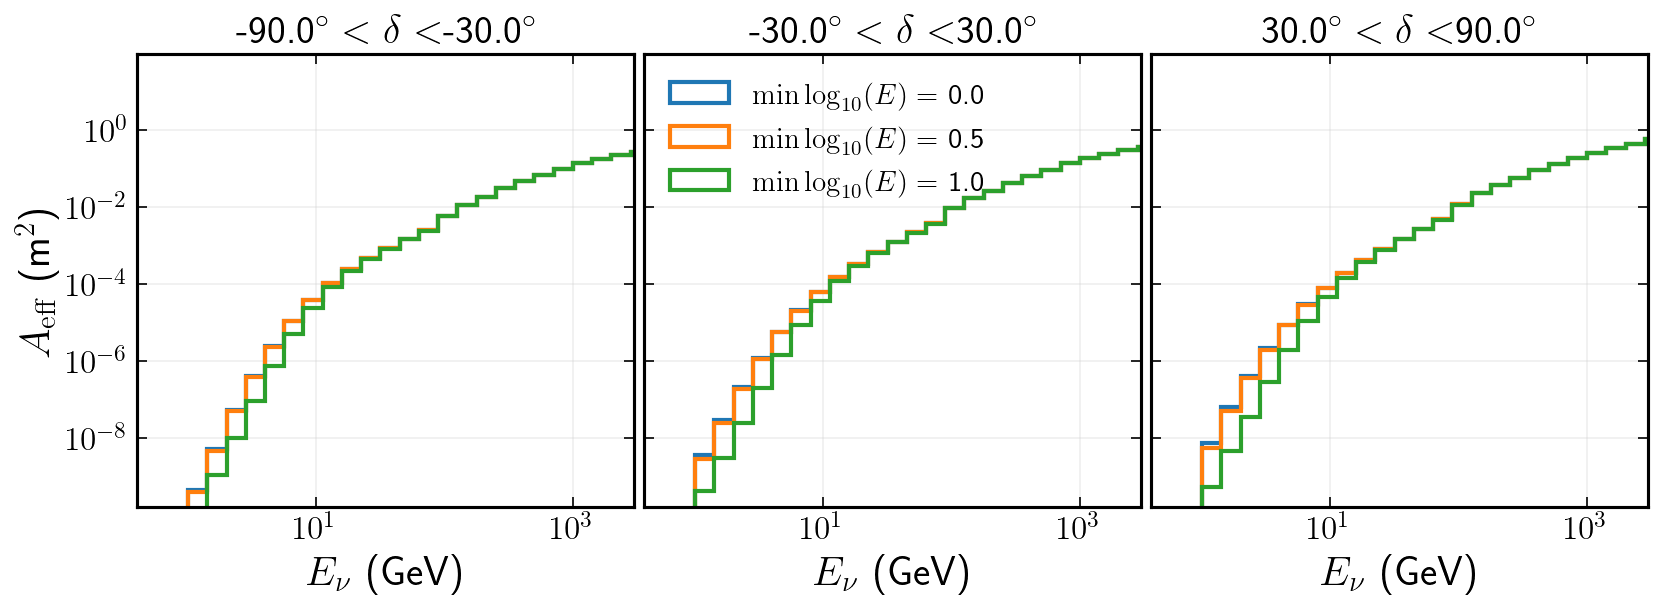

In [29]:
fig, aaxs = plt.subplots(nrows=1, ncols=3, figsize=(13,4), dpi=150, sharey=True)
plt.subplots_adjust(hspace=0.02, wspace=0.02)
axs = np.ravel(aaxs)

decs = np.radians(np.asarray([[-90., -30.], [-30., 30.], [30., 90.]]))
sin_decs = np.sin(decs)

mc = gplots.ana.anas[0].sig
E_bins = np.logspace(0., 9., 61)
logE_bins = np.log10(E_bins)
dlog_E = np.diff(logE_bins)

for ii, (low_dec, high_dec) in enumerate(sin_decs):
    d_omega = 2.*np.pi*np.abs(high_dec - low_dec)
    dec_msk = np.sin(mc['true_dec']) > low_dec
    dec_msk *= np.sin(mc['true_dec']) < high_dec
    dec_cut = mc[dec_msk]
    for e_cut in [0.0, 0.5, 1.0]:
        en_msk = dec_cut['log10energy'] > e_cut
        mc_cut = dec_cut[en_msk]

        weights = mc_cut['oneweight'] / (1e4 * mc_cut['true_energy'] * dlog_E[np.digitize(
            np.log10(mc_cut['true_energy']), bins = logE_bins) -1] * d_omega * np.log(10.))
        
        axs[ii].hist(mc_cut['true_energy'], bins = E_bins, 
                weights = weights,
                histtype = 'step', linewidth = 2., 
                label=r'$\min\log_{10}(E) = $' + f" {e_cut:.1f}")

    axs[ii].set_yscale('log')
    axs[ii].set_xscale('log')
    axs[ii].set_xlim(4e-1, 3e3)
    axs[ii].set_xlabel(r'$E_{\nu}$ (GeV)', fontsize = 20)
    if ii == 0:
        axs[ii].set_ylabel('$A_{\mathrm{eff}}$ (m$^{2}$)', fontsize=20)
    if ii == 1:
        axs[ii].legend(loc=2, fontsize=14, frameon=False)
    axs[ii].set_title(f"{np.degrees(np.arcsin(low_dec)):.1f}" + r'$^{\circ} <  \delta < \; $' \
                      + f"{np.degrees(np.arcsin(high_dec)):.1f}" + r'$^{\circ}$')
plt.show()

In [ ]:
gplots